# Importing required libraries 

In [1]:
import numpy as np
import pandas as pd
import os
import statsmodels
from statsmodels import stats
import matplotlib
from matplotlib import pyplot as plt
import pylab
from pylab import plot, show
from pylab import legend, title, xlabel, ylabel
import seaborn as sns

In [2]:
pd.set_option('display.max_rows',None)

In [3]:
pd.reset_option('display.max_rows')

# Loading the Application_data file

In [3]:
df_app = pd.read_csv('application_data.csv')

In [4]:
df_app.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
#checking out count of columns and rows in the dataframe
df_app.shape

(307511, 122)

In [6]:
#printing information about data types
df_app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [7]:
#calculating the central tendency of dataset
df_app.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [8]:
#checking the null values of application data and previous data
df_app.isnull().sum()

SK_ID_CURR                           0
TARGET                               0
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                         12
AMT_GOODS_PRICE                    278
NAME_TYPE_SUITE                   1292
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
OWN_CAR_AGE                     202929
FLAG_MOBIL                           0
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0
FLAG_CONT_MOBILE         

# Cleaning the Application_data dataset

In [9]:
#let's find out the percentage counts of null values for better understanding
null_count = df_app.isnull().sum()/307511*100
null_count
#this will provide us the overall null values percentage so that we can drop the values that are belonging below 50%

SK_ID_CURR                       0.000000
TARGET                           0.000000
NAME_CONTRACT_TYPE               0.000000
CODE_GENDER                      0.000000
FLAG_OWN_CAR                     0.000000
FLAG_OWN_REALTY                  0.000000
CNT_CHILDREN                     0.000000
AMT_INCOME_TOTAL                 0.000000
AMT_CREDIT                       0.000000
AMT_ANNUITY                      0.003902
AMT_GOODS_PRICE                  0.090403
NAME_TYPE_SUITE                  0.420148
NAME_INCOME_TYPE                 0.000000
NAME_EDUCATION_TYPE              0.000000
NAME_FAMILY_STATUS               0.000000
NAME_HOUSING_TYPE                0.000000
REGION_POPULATION_RELATIVE       0.000000
DAYS_BIRTH                       0.000000
DAYS_EMPLOYED                    0.000000
DAYS_REGISTRATION                0.000000
DAYS_ID_PUBLISH                  0.000000
OWN_CAR_AGE                     65.990810
FLAG_MOBIL                       0.000000
FLAG_EMP_PHONE                   0

In [10]:
#checking the null_count which is less than 50% and storing it in new data frame
drop_app = null_count[null_count > 50].index
#.index is basically used for retrieving the index value for columns for filtering

In [11]:
drop_app.size

41

In [12]:
#dropping the columns which having null_count > 50% and storing remaining columns in another dataframes
cleaned_df_app = df_app.drop(columns=drop_app)

In [13]:
cleaned_df_app.shape

(307511, 81)

In [14]:
cleaned_df_app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 81 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   SK_ID_CURR                    307511 non-null  int64  
 1   TARGET                        307511 non-null  int64  
 2   NAME_CONTRACT_TYPE            307511 non-null  object 
 3   CODE_GENDER                   307511 non-null  object 
 4   FLAG_OWN_CAR                  307511 non-null  object 
 5   FLAG_OWN_REALTY               307511 non-null  object 
 6   CNT_CHILDREN                  307511 non-null  int64  
 7   AMT_INCOME_TOTAL              307511 non-null  float64
 8   AMT_CREDIT                    307511 non-null  float64
 9   AMT_ANNUITY                   307499 non-null  float64
 10  AMT_GOODS_PRICE               307233 non-null  float64
 11  NAME_TYPE_SUITE               306219 non-null  object 
 12  NAME_INCOME_TYPE              307511 non-nul

<Axes: >

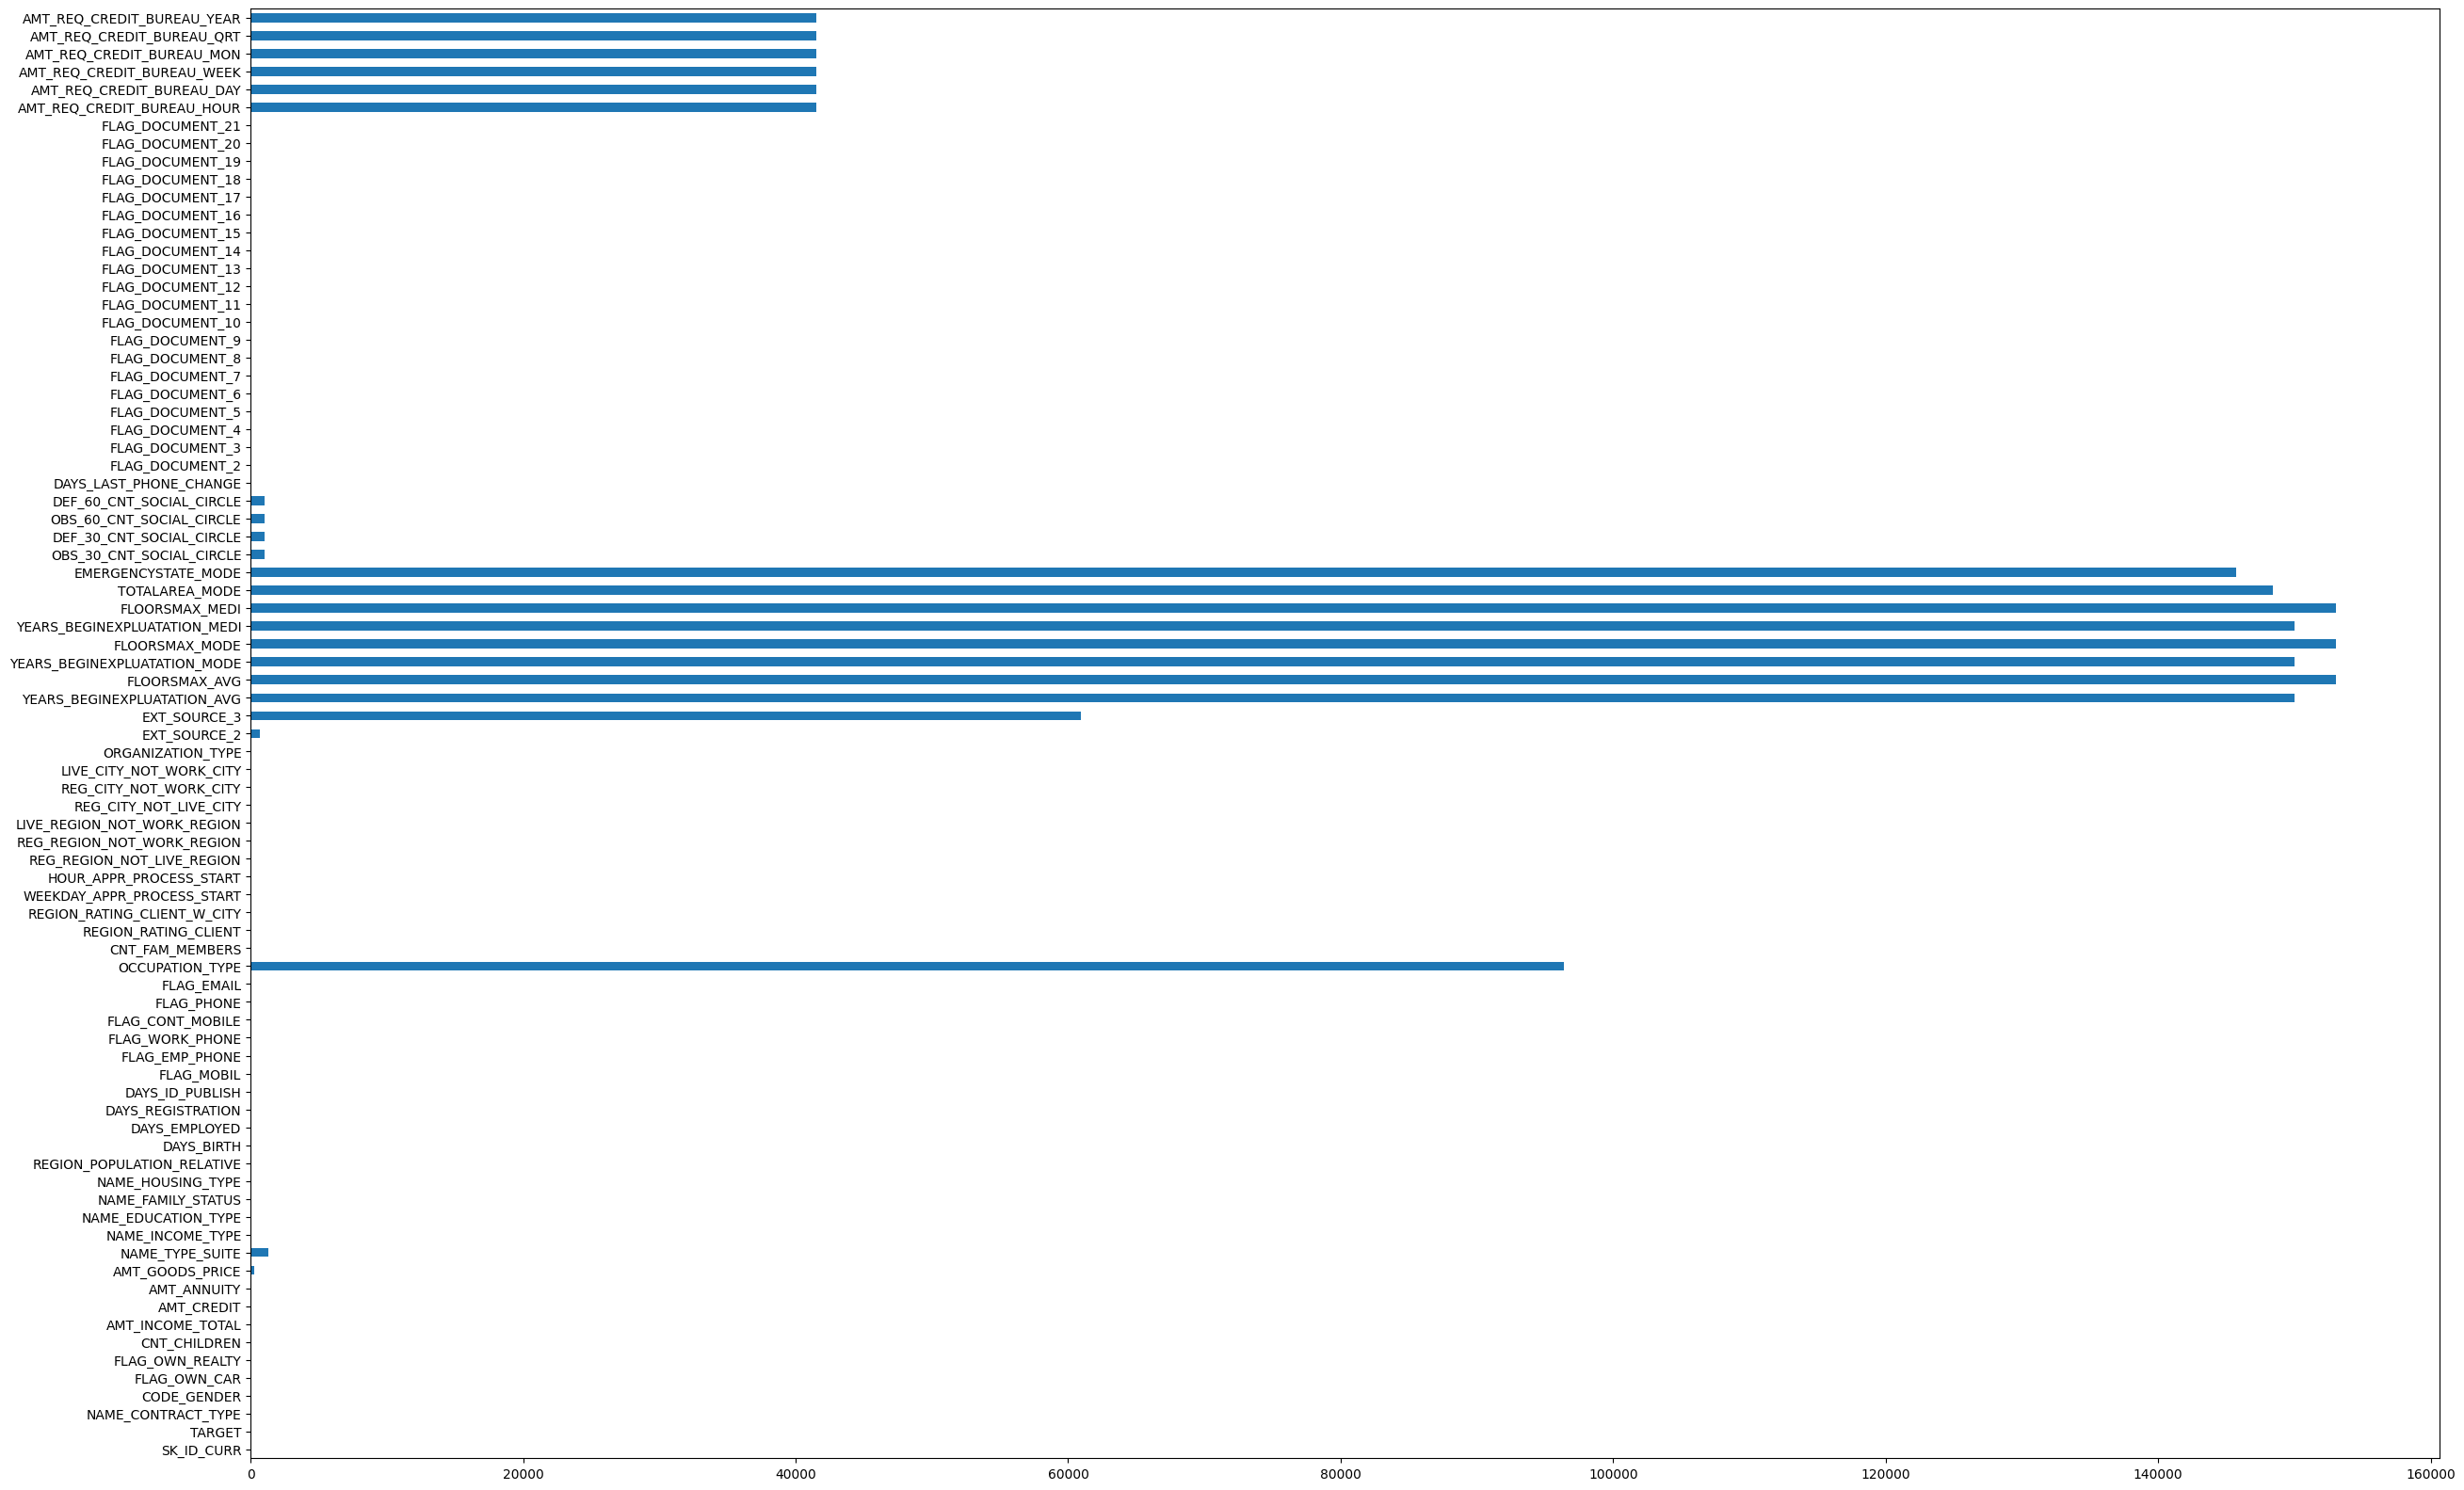

In [15]:
#ploting bar graph for visualizing new data frame containg null values
plt.figure(figsize=(30,20))
(cleaned_df_app.isna().sum()).plot.barh()

after analyzing from above bar plot we see that there are Emergencystate_mode, totalarea_mode, floorsmax_mode, years_beginexpluatattion_mode,
floorsmax_avg, years_beginexpluatattion_avg these columns which are containing excess amount of null values so better way is that we can drop these columns.

from my analysis i am thinking that we have no need of these columns as this columns not affecting on our problem statement so that we can drop these columns too..

In [16]:
#again checking the null_count which is less than 40% so that we can drop these values also
drop_app = null_count[null_count > 40].index

In [17]:
drop_app.size

49

In [18]:
cleaned_df_app = df_app.drop(columns=drop_app)

In [19]:
cleaned_df_app.shape

(307511, 73)

In [20]:
cleaned_df_app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 73 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_TYPE_SUITE              306219 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

<Axes: >

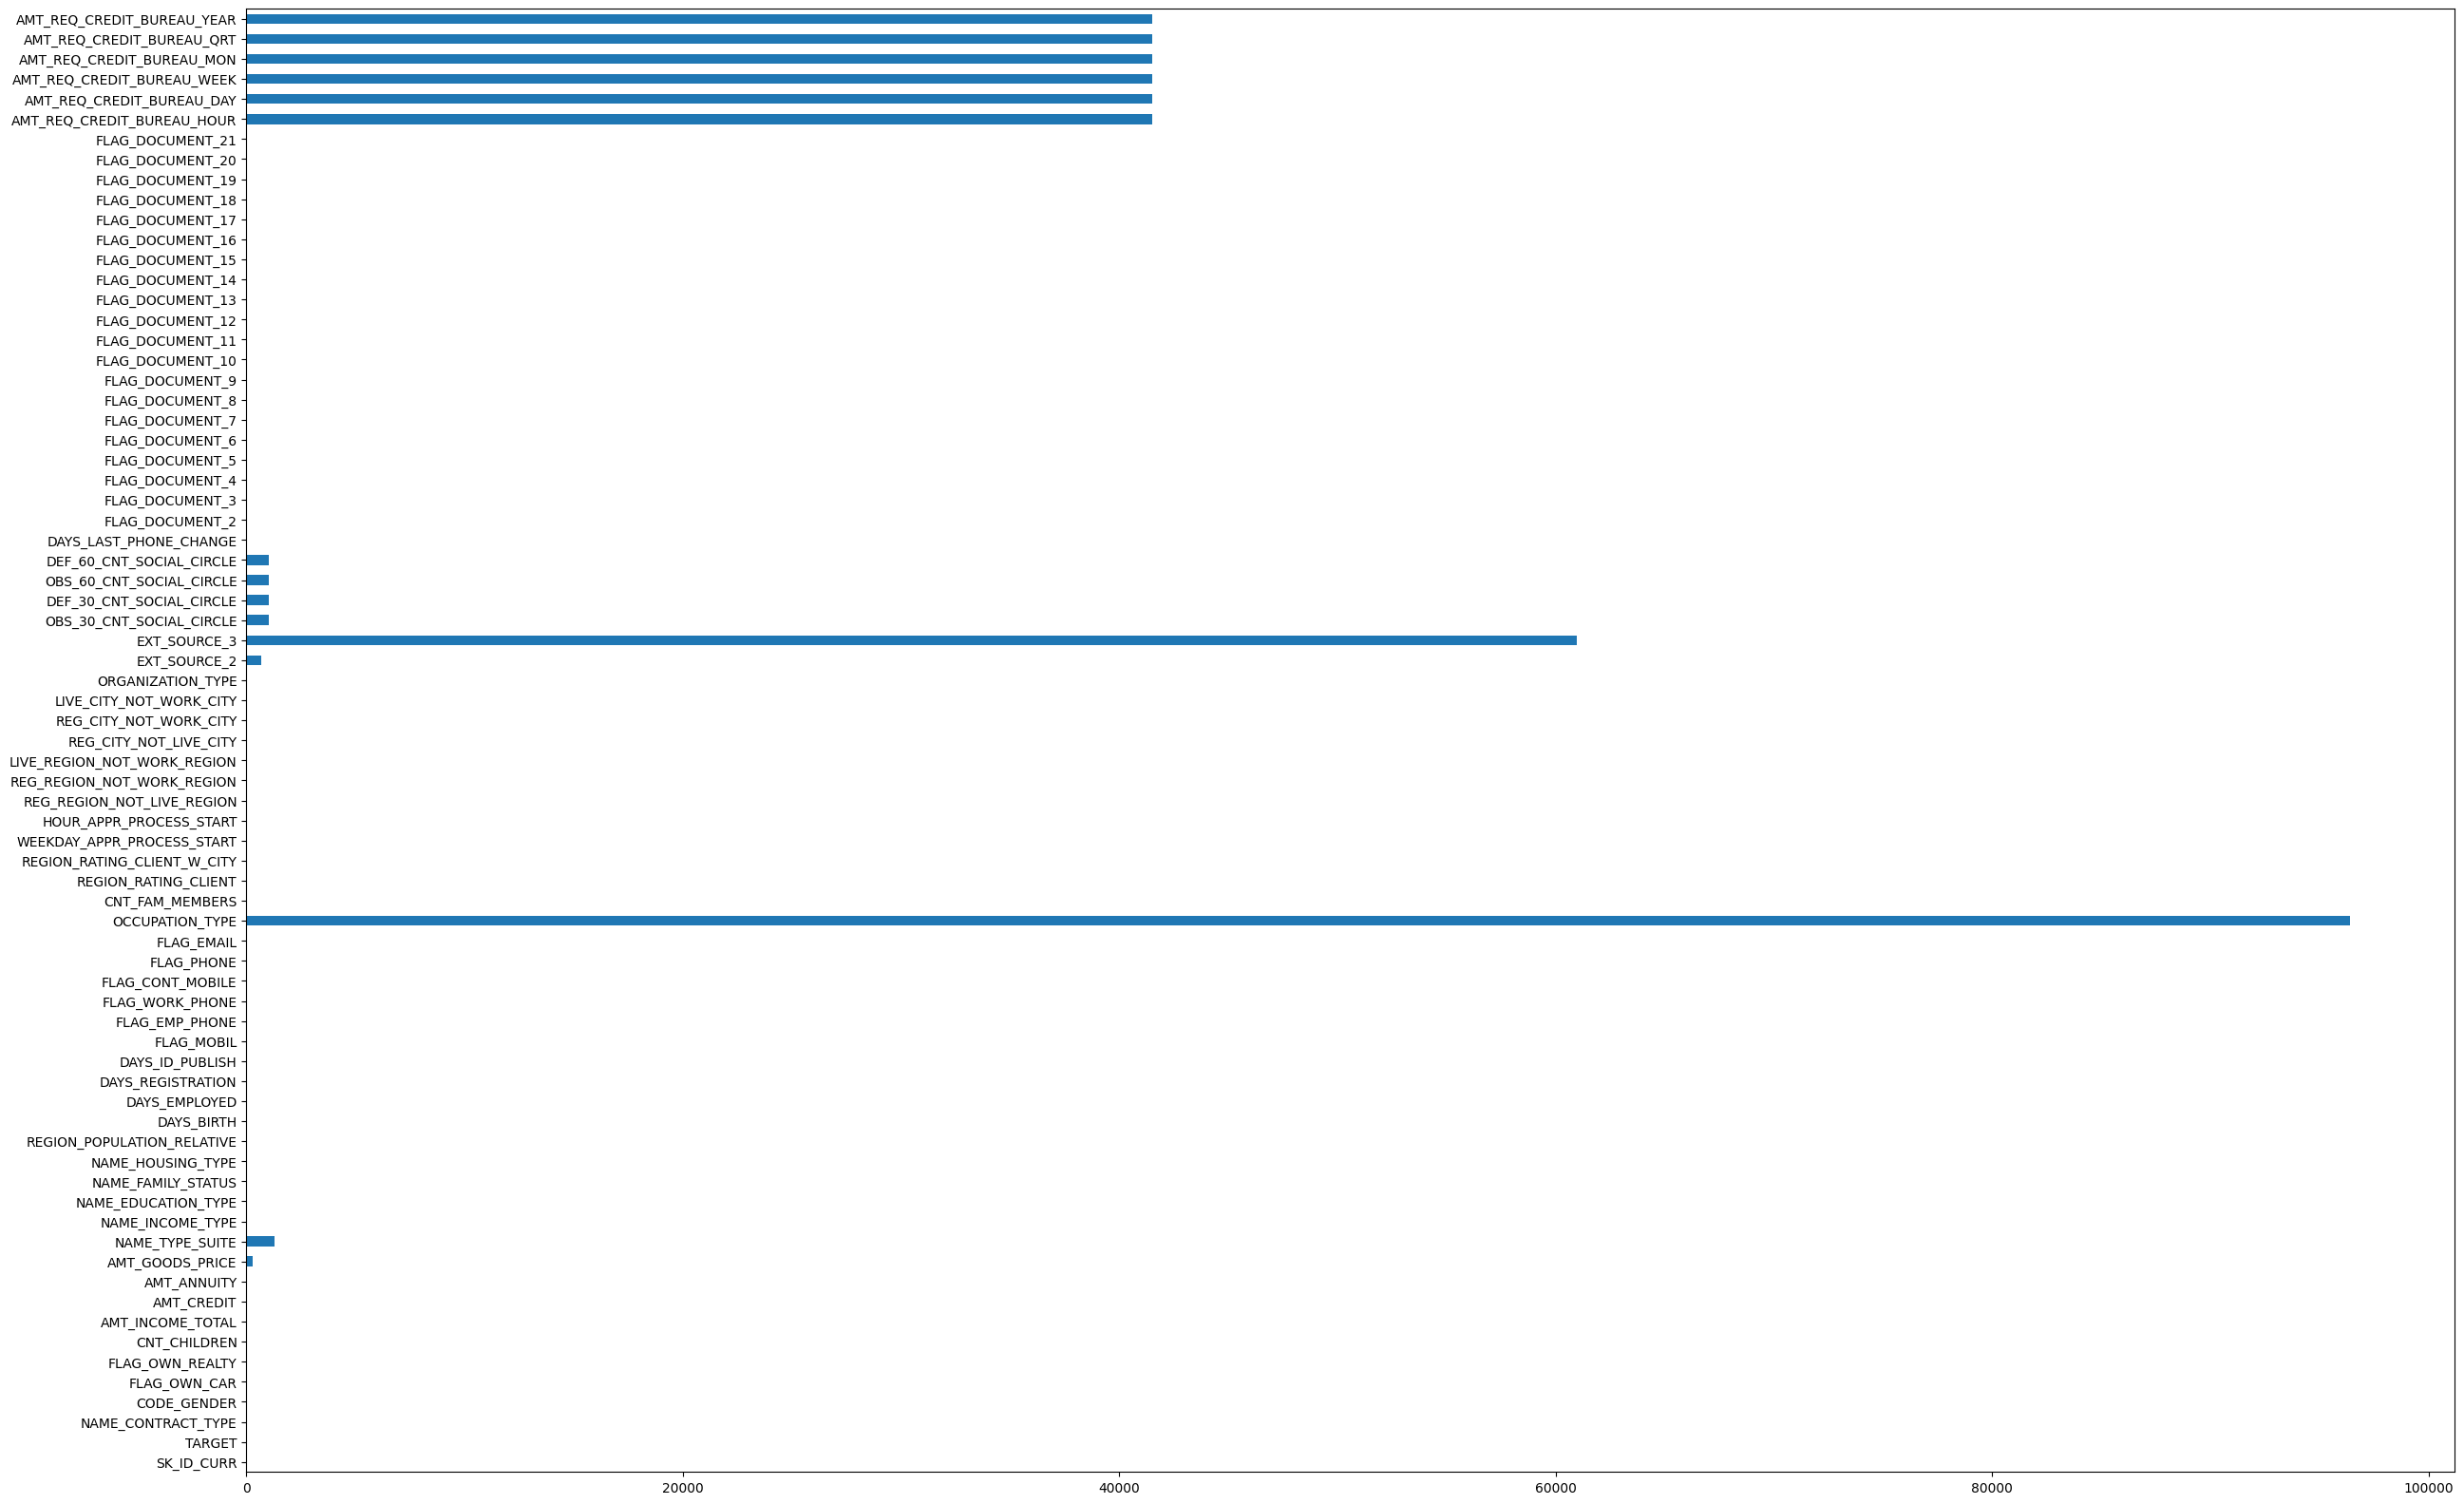

In [21]:
plt.figure(figsize=(30,20))
(cleaned_df_app.isna().sum()).plot.barh()

# By checking above bar graph occupation type column has maximum null values

In [22]:
cleaned_df_app['OCCUPATION_TYPE'].value_counts()

OCCUPATION_TYPE
Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: count, dtype: int64

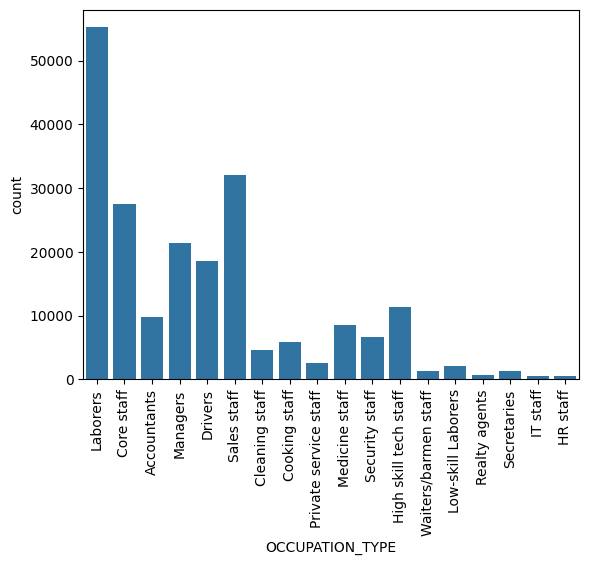

In [23]:
sns.countplot(data=cleaned_df_app, x="OCCUPATION_TYPE")
plt.xticks(rotation=90)
plt.show()

# by checking above information and graph we can say that

The most of the loan applications coming from an Laborers background, sales staff, core staff

The average loan applications coming from an Managers, Drivers, High skill tech staff, Accountants, cleaning staff, cooking staff, medicine staff, security staff, 

and less loan applications coming from an Private service staff, waiters/barmen staff, low skill laboreres, realty agents, secretaries, IT staff, HR stafff

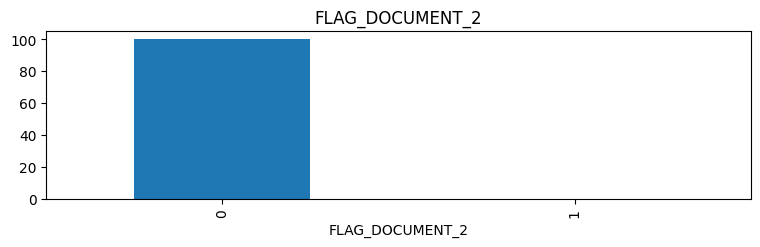

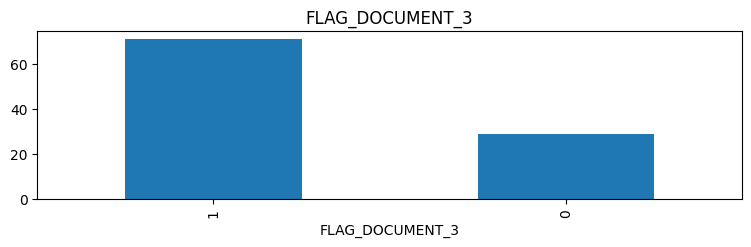

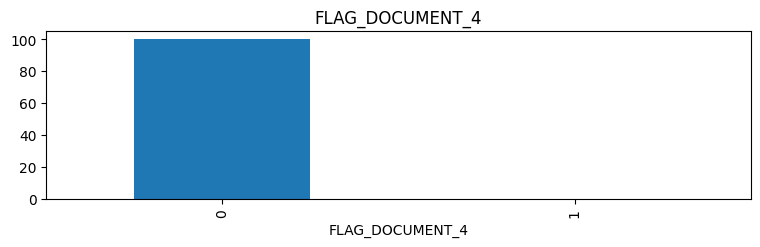

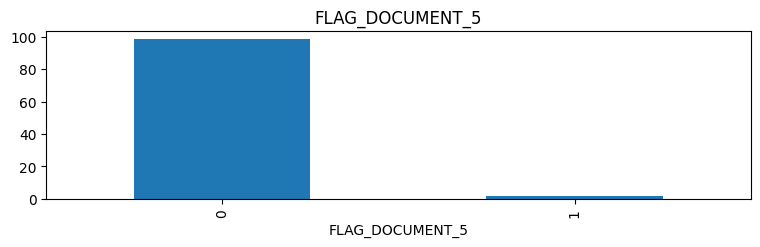

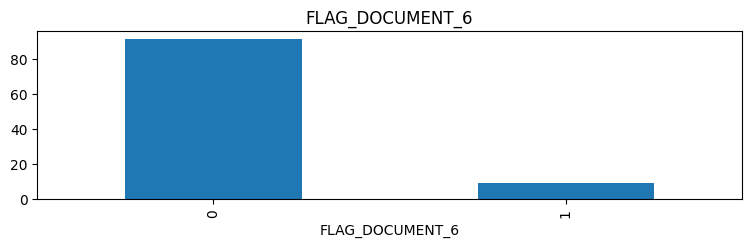

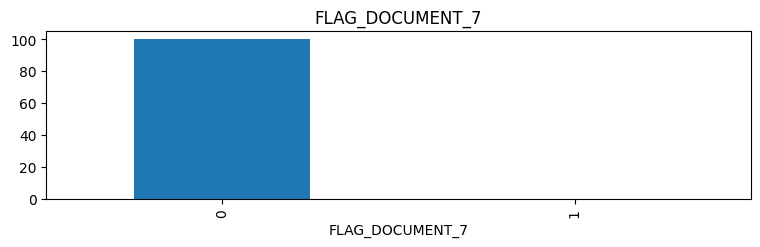

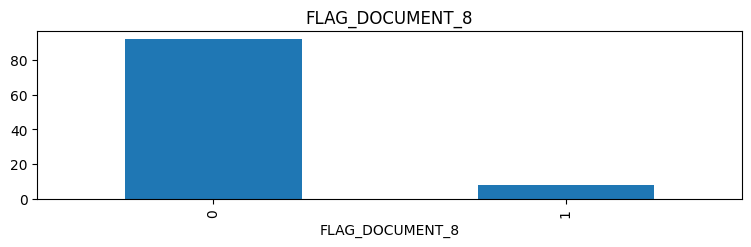

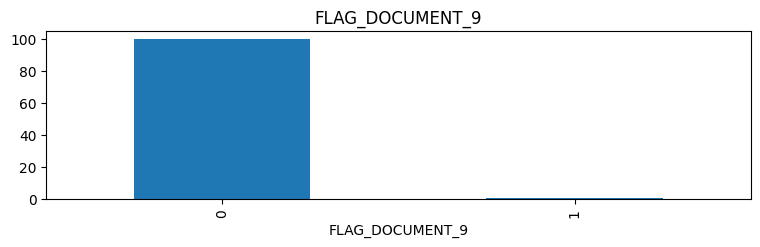

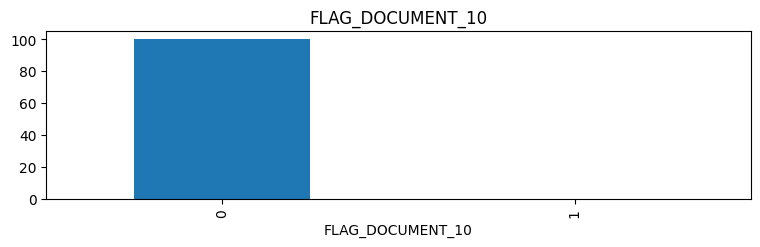

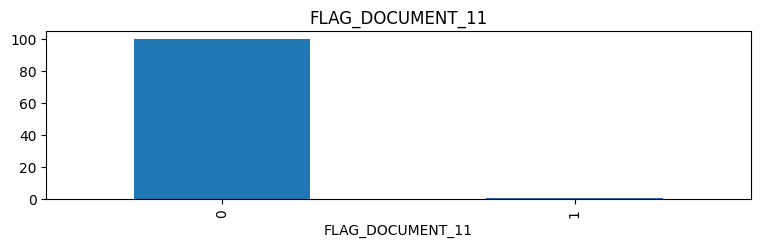

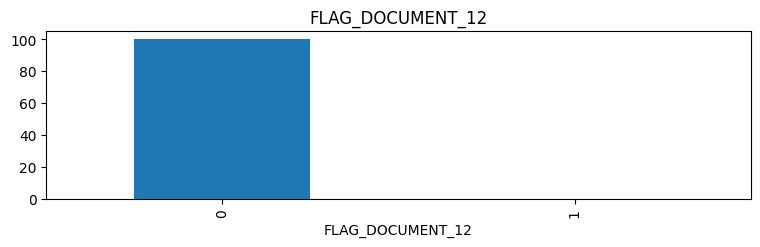

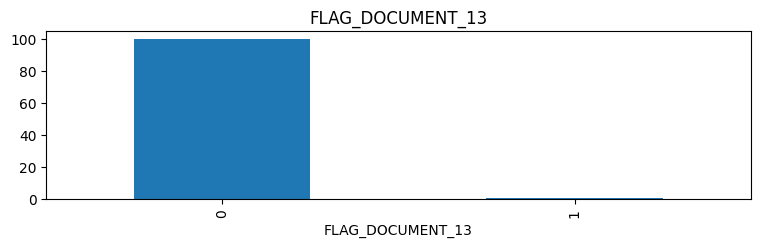

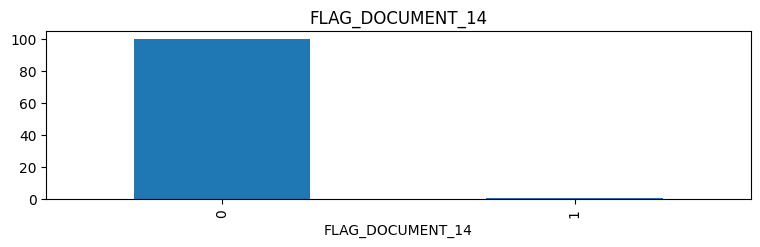

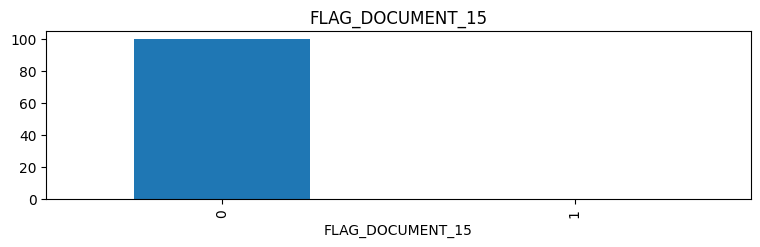

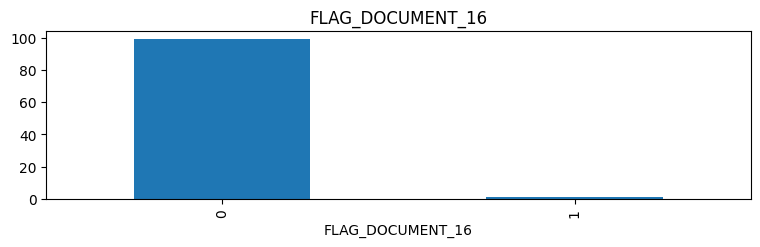

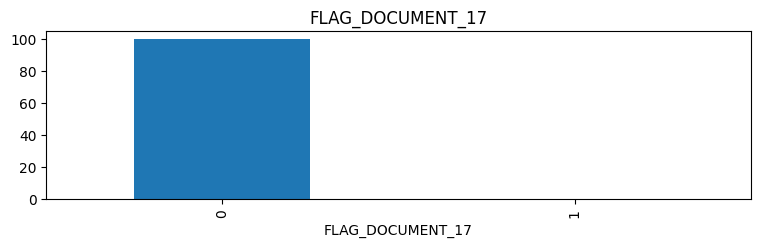

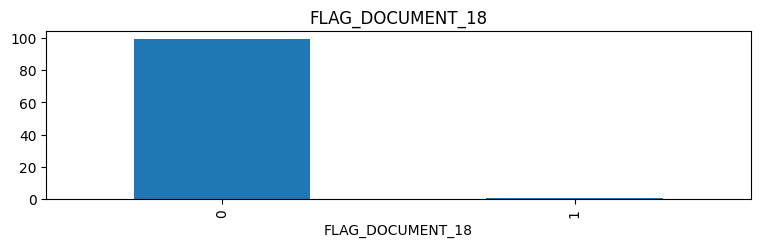

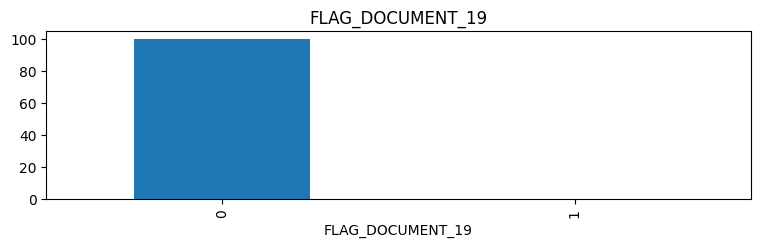

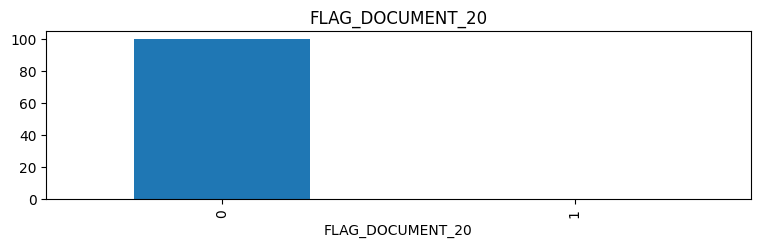

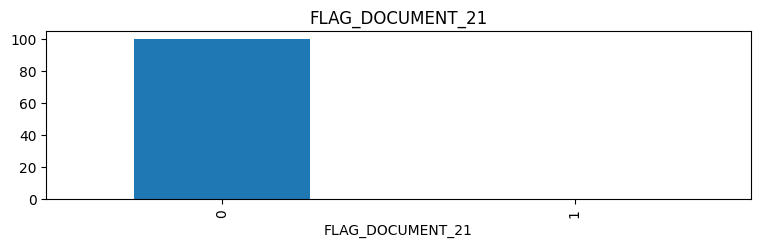

In [24]:
for i in cleaned_df_app.columns:
    if 'flag_document' in i.lower():
        plt.figure(figsize=(20,10))
        plt.subplot(4,2,1)
        plt.title(i)
        (cleaned_df_app[i].value_counts()*100/cleaned_df_app.shape[0]).plot.bar()

* above graphs showing count of documents which are not provided by the applicants at the time of application.
* 0 shows that documents are not submmited by applicants and 1 shows that documents are submmited by application.
* as per my analysis, i am not considering this columns are affecting on my problem statement that's why i am dropping this columns too..

In [25]:
#this columns can be removed
drop_columns = ['FLAG_MOBIL','FLAG_EMP_PHONE','FLAG_CONT_MOBILE',
                'FLAG_EMAIL','FLAG_DOCUMENT_3','FLAG_DOCUMENT_4','FLAG_DOCUMENT_5',
                'FLAG_DOCUMENT_6','FLAG_DOCUMENT_7','FLAG_DOCUMENT_8','FLAG_DOCUMENT_9',
                'FLAG_DOCUMENT_10','FLAG_DOCUMENT_11','FLAG_DOCUMENT_12','FLAG_DOCUMENT_13',
                'FLAG_DOCUMENT_14','FLAG_DOCUMENT_15','FLAG_DOCUMENT_16','FLAG_DOCUMENT_17',
                'FLAG_DOCUMENT_18','FLAG_DOCUMENT_19','FLAG_DOCUMENT_20','FLAG_DOCUMENT_21']

In [26]:
#deleting above columns and printing other remaining columns and rows
cleaned_df_app.drop(drop_columns,axis=1,inplace=True)

In [27]:
cleaned_df_app.shape

(307511, 50)

In [28]:
cleaned_df_app.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
       'FLAG_WORK_PHONE', 'FLAG_PHONE', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_

In [29]:
cleaned_df_app = cleaned_df_app.fillna(0)

In [30]:
cleaned_df_app.isnull().sum()

SK_ID_CURR                     0
TARGET                         0
NAME_CONTRACT_TYPE             0
CODE_GENDER                    0
FLAG_OWN_CAR                   0
FLAG_OWN_REALTY                0
CNT_CHILDREN                   0
AMT_INCOME_TOTAL               0
AMT_CREDIT                     0
AMT_ANNUITY                    0
AMT_GOODS_PRICE                0
NAME_TYPE_SUITE                0
NAME_INCOME_TYPE               0
NAME_EDUCATION_TYPE            0
NAME_FAMILY_STATUS             0
NAME_HOUSING_TYPE              0
REGION_POPULATION_RELATIVE     0
DAYS_BIRTH                     0
DAYS_EMPLOYED                  0
DAYS_REGISTRATION              0
DAYS_ID_PUBLISH                0
FLAG_WORK_PHONE                0
FLAG_PHONE                     0
OCCUPATION_TYPE                0
CNT_FAM_MEMBERS                0
REGION_RATING_CLIENT           0
REGION_RATING_CLIENT_W_CITY    0
WEEKDAY_APPR_PROCESS_START     0
HOUR_APPR_PROCESS_START        0
REG_REGION_NOT_LIVE_REGION     0
REG_REGION

# Plotting the graphs for the outliers

<Axes: >

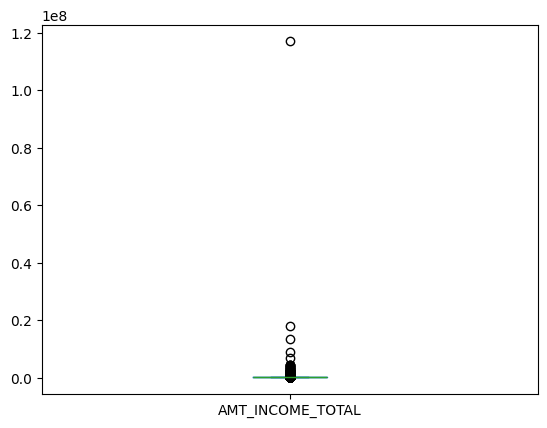

In [31]:
(cleaned_df_app['AMT_INCOME_TOTAL']).plot.box()

<Axes: >

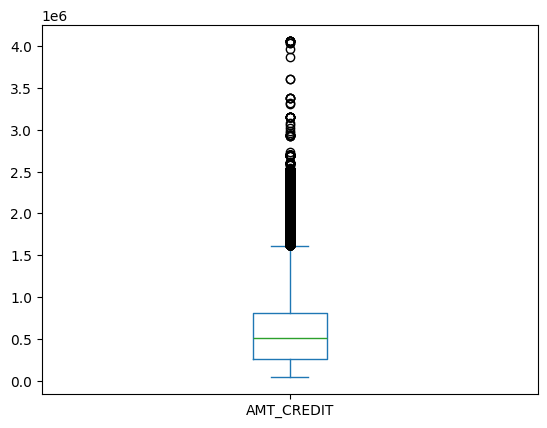

In [32]:
(cleaned_df_app['AMT_CREDIT']).plot.box()

<Axes: >

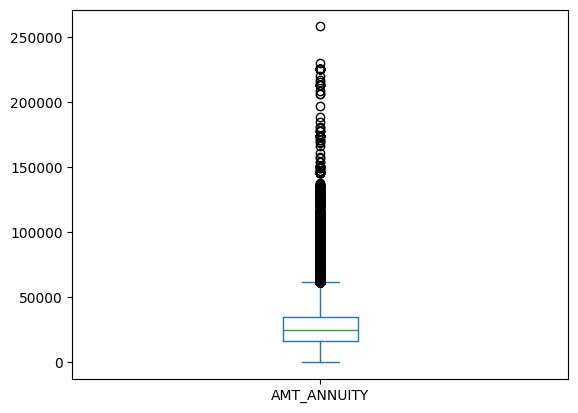

In [33]:
(cleaned_df_app['AMT_ANNUITY']).plot.box()

# Loading the Previous_application file

In [34]:
df_pre = pd.read_csv('previous_application.csv')

In [35]:
df_pre.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
#checking out count of columns and rows in the dataframe
df_pre.shape #1670214 - rows & 37 - columns

(1670214, 37)

In [37]:
df_pre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [38]:
df_pre.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,...,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,7.743700e+05,1.284699e+06,1.670214e+06,1.670214e+06,774370.000000,...,5951.000000,1.670214e+06,1.670214e+06,1.297984e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,6.697402e+03,2.278473e+05,1.248418e+01,9.964675e-01,0.079637,...,0.773503,-8.806797e+02,3.139511e+02,1.605408e+01,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,0.332570
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,2.092150e+04,3.153966e+05,3.334028e+00,5.932963e-02,0.107823,...,0.100879,7.790997e+02,7.127443e+03,1.456729e+01,88916.115833,72444.869708,106857.034789,149647.415123,153303.516729,0.471134
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000015,...,0.373150,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,0.000000e+00,5.084100e+04,1.000000e+01,1.000000e+00,0.000000,...,0.715645,-1.300000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,0.000000
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.638000e+03,1.123200e+05,1.200000e+01,1.000000e+00,0.051605,...,0.835095,-5.810000e+02,3.000000e+00,1.200000e+01,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,0.000000
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,7.740000e+03,2.340000e+05,1.500000e+01,1.000000e+00,0.108909,...,0.852537,-2.800000e+02,8.200000e+01,2.400000e+01,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,1.000000
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,3.060045e+06,6.905160e+06,2.300000e+01,1.000000e+00,1.000000,...,1.000000,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


# Cleaning the Previous Application File

In [39]:
#checking the null value count of previous application file
df_pre.isnull().sum()

SK_ID_PREV                           0
SK_ID_CURR                           0
NAME_CONTRACT_TYPE                   0
AMT_ANNUITY                     372235
AMT_APPLICATION                      0
AMT_CREDIT                           1
AMT_DOWN_PAYMENT                895844
AMT_GOODS_PRICE                 385515
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
RATE_DOWN_PAYMENT               895844
RATE_INTEREST_PRIMARY          1664263
RATE_INTEREST_PRIVILEGED       1664263
NAME_CASH_LOAN_PURPOSE               0
NAME_CONTRACT_STATUS                 0
DAYS_DECISION                        0
NAME_PAYMENT_TYPE                    0
CODE_REJECT_REASON                   0
NAME_TYPE_SUITE                 820405
NAME_CLIENT_TYPE                     0
NAME_GOODS_CATEGORY                  0
NAME_PORTFOLIO                       0
NAME_PRODUCT_TYPE                    0
CHANNEL_TYPE             

In [40]:
#finding percentage of null value counts so that we can remove columns that are not needed and which has null values greater than 40%
null_pre = df_pre.isnull().sum()/1670214*100
null_pre

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    22.286665
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000060
AMT_DOWN_PAYMENT               53.636480
AMT_GOODS_PRICE                23.081773
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
RATE_DOWN_PAYMENT              53.636480
RATE_INTEREST_PRIMARY          99.643698
RATE_INTEREST_PRIVILEGED       99.643698
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_TYPE_SUITE                49.119754
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYP

In [41]:
drop_pre = null_pre[null_pre > 40].index
drop_pre

Index(['AMT_DOWN_PAYMENT', 'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       'RATE_INTEREST_PRIVILEGED', 'NAME_TYPE_SUITE', 'DAYS_FIRST_DRAWING',
       'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE',
       'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')

From my analysis, I am thinking that we can drop these columns that having null values count greater than 40%. This columns having maximum null values so we can drop this columns.

In [42]:
cleaned_df_pre = df_pre.drop(columns=drop_pre)

In [43]:
cleaned_df_pre.shape

(1670214, 26)

In [44]:
cleaned_df_pre.isnull().sum()

SK_ID_PREV                          0
SK_ID_CURR                          0
NAME_CONTRACT_TYPE                  0
AMT_ANNUITY                    372235
AMT_APPLICATION                     0
AMT_CREDIT                          1
AMT_GOODS_PRICE                385515
WEEKDAY_APPR_PROCESS_START          0
HOUR_APPR_PROCESS_START             0
FLAG_LAST_APPL_PER_CONTRACT         0
NFLAG_LAST_APPL_IN_DAY              0
NAME_CASH_LOAN_PURPOSE              0
NAME_CONTRACT_STATUS                0
DAYS_DECISION                       0
NAME_PAYMENT_TYPE                   0
CODE_REJECT_REASON                  0
NAME_CLIENT_TYPE                    0
NAME_GOODS_CATEGORY                 0
NAME_PORTFOLIO                      0
NAME_PRODUCT_TYPE                   0
CHANNEL_TYPE                        0
SELLERPLACE_AREA                    0
NAME_SELLER_INDUSTRY                0
CNT_PAYMENT                    372230
NAME_YIELD_GROUP                    0
PRODUCT_COMBINATION               346
dtype: int64

<Axes: >

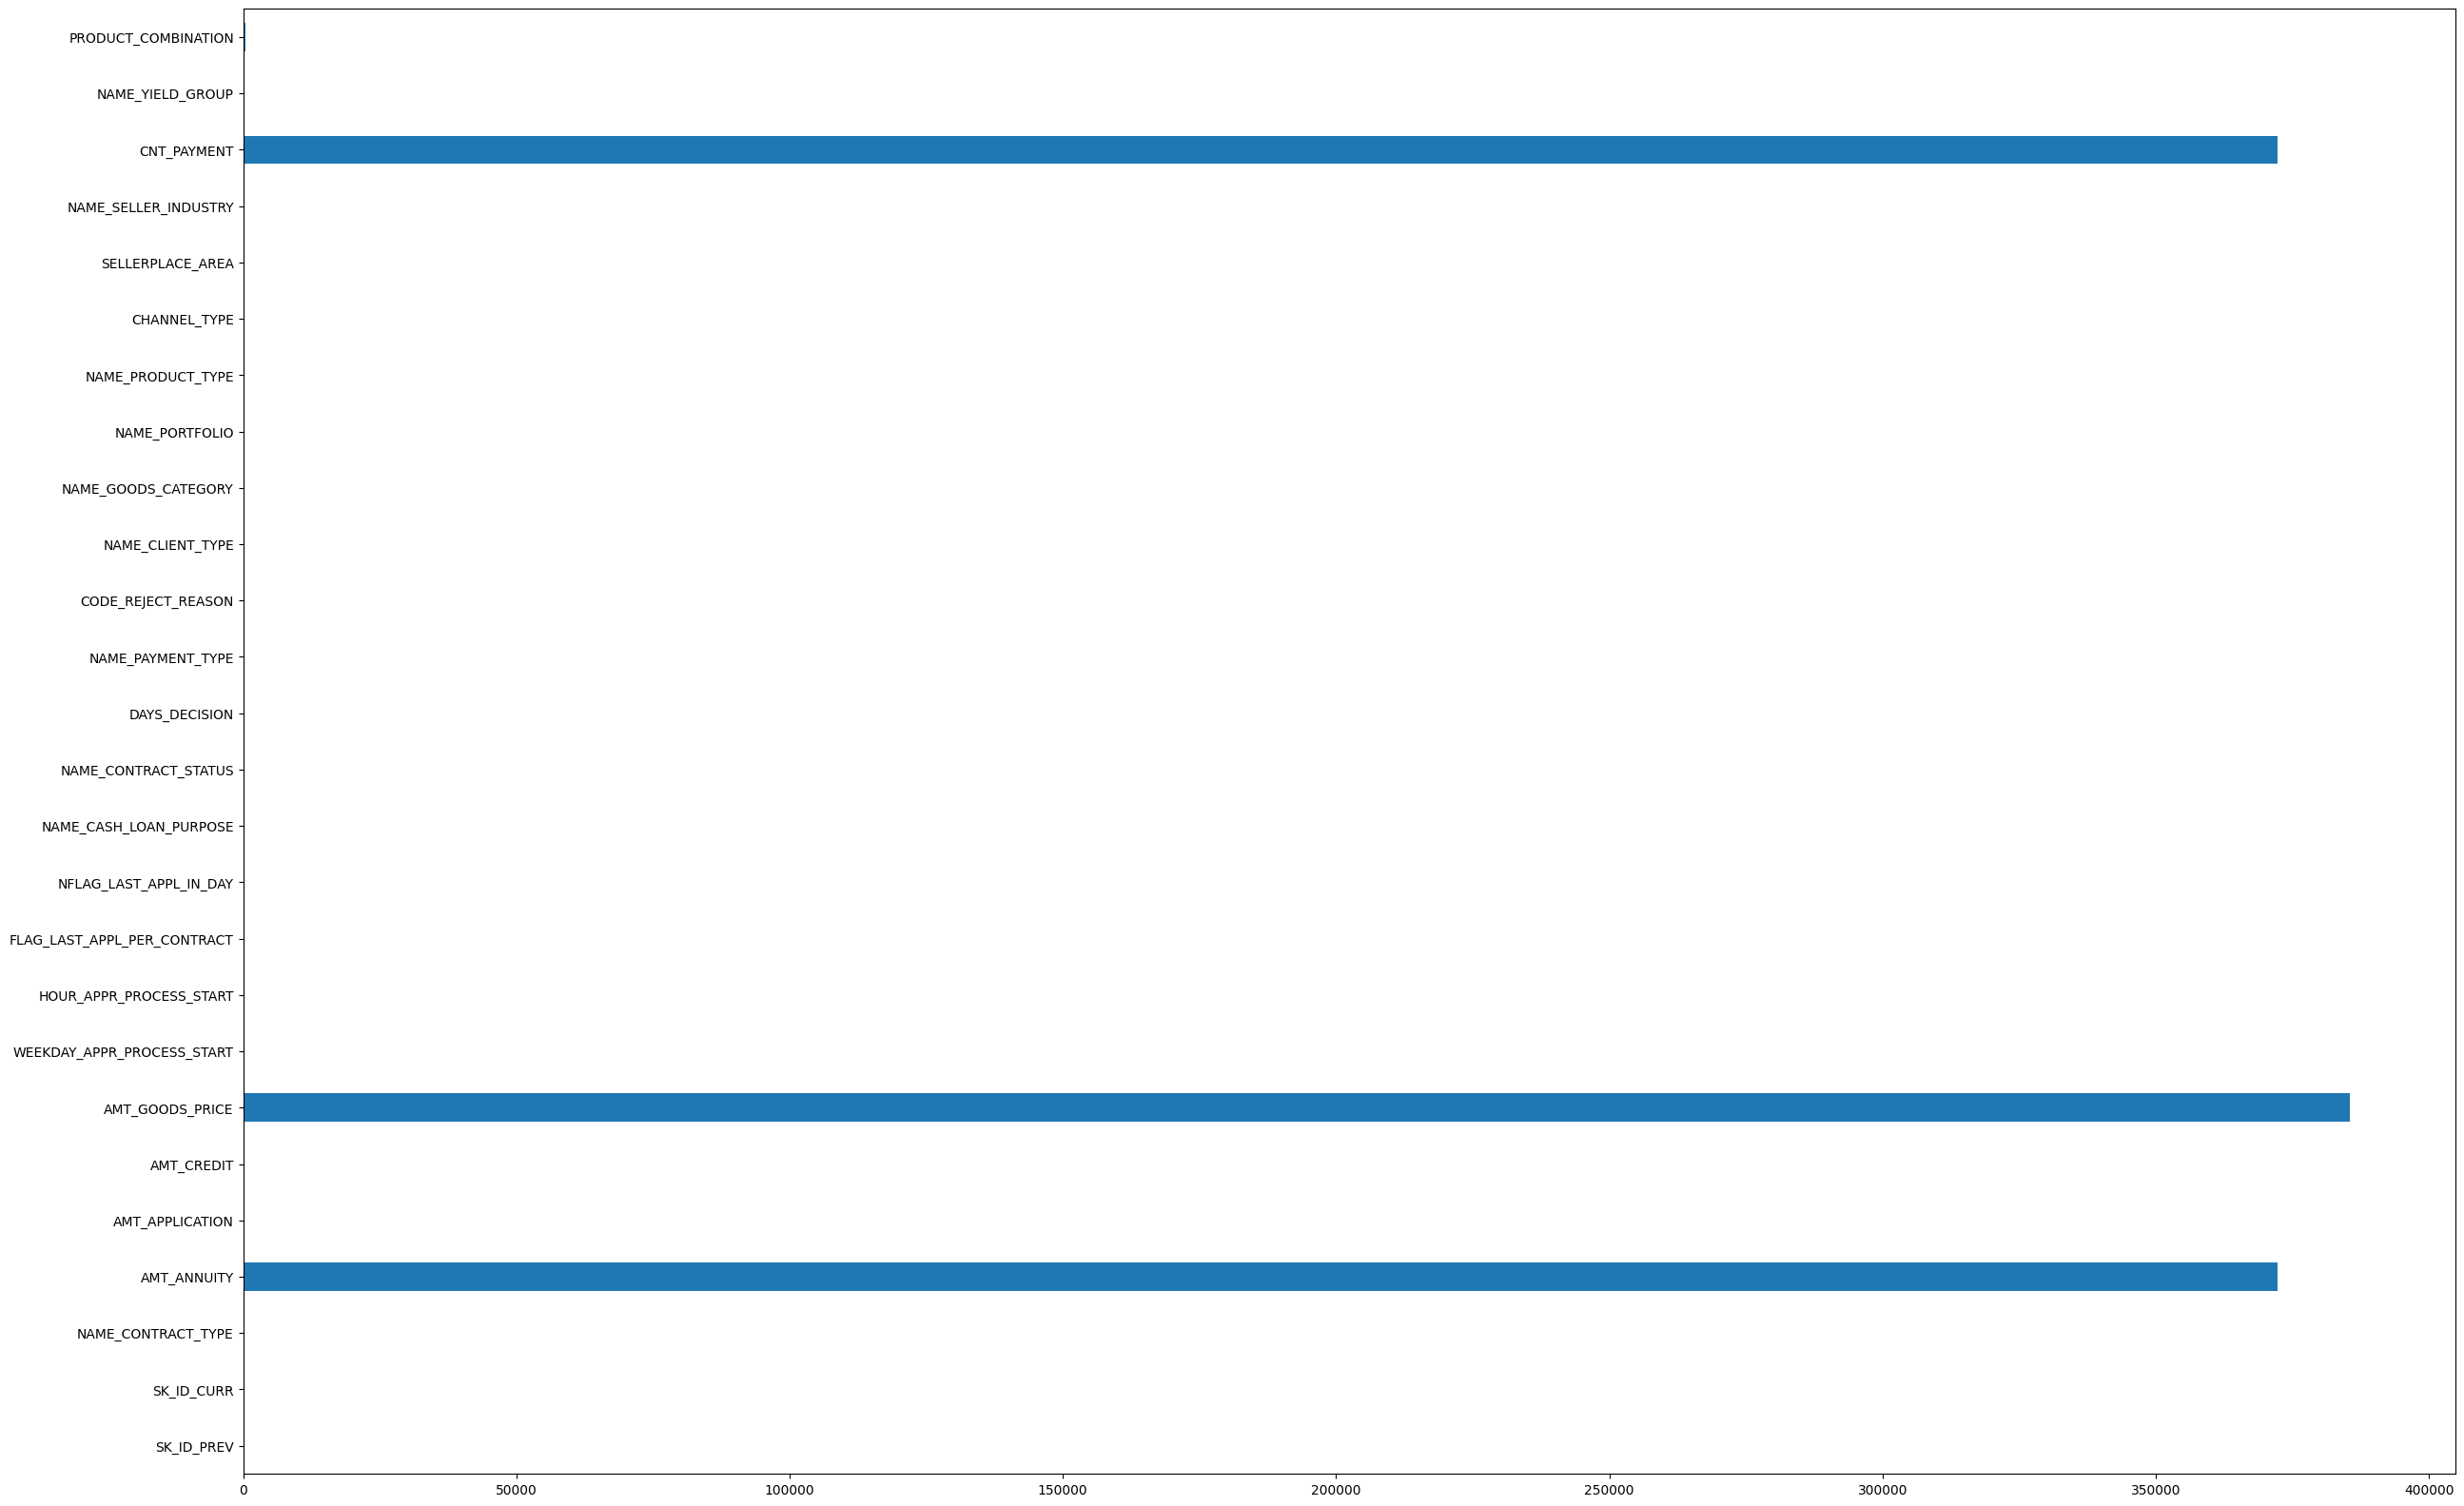

In [45]:
plt.figure(figsize=(30,20))
(cleaned_df_pre.isnull().sum().plot.barh())

as per analysis there are AMT_ANNUITY, AMT_GOODS_PRICE, CNT_PAYMENT, PRODUCT_COMBINATION these columns contains null values

so we can directly drop these columns, 

but as per analysis, this columns should affect on problem statement better way is that we can fill this null values with median values of this columns

because median values helps to identify skeweness of the data

# Filling values inside null values

In [46]:
cleaned_df_pre['AMT_ANNUITY'].fillna(cleaned_df_pre['AMT_ANNUITY'].median(),inplace=True)
cleaned_df_pre['AMT_GOODS_PRICE'].fillna(cleaned_df_pre['AMT_GOODS_PRICE'].median(),inplace=True)
cleaned_df_pre['CNT_PAYMENT'].fillna(cleaned_df_pre['CNT_PAYMENT'].median(),inplace=True)

C:\Users\vinay\AppData\Local\Temp\ipykernel_16276\2833678273.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cleaned_df_pre['AMT_ANNUITY'].fillna(cleaned_df_pre['AMT_ANNUITY'].median(),inplace=True)
C:\Users\vinay\AppData\Local\Temp\ipykernel_16276\2833678273.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting 

In [47]:
cleaned_df_pre.isnull().sum()

SK_ID_PREV                       0
SK_ID_CURR                       0
NAME_CONTRACT_TYPE               0
AMT_ANNUITY                      0
AMT_APPLICATION                  0
AMT_CREDIT                       1
AMT_GOODS_PRICE                  0
WEEKDAY_APPR_PROCESS_START       0
HOUR_APPR_PROCESS_START          0
FLAG_LAST_APPL_PER_CONTRACT      0
NFLAG_LAST_APPL_IN_DAY           0
NAME_CASH_LOAN_PURPOSE           0
NAME_CONTRACT_STATUS             0
DAYS_DECISION                    0
NAME_PAYMENT_TYPE                0
CODE_REJECT_REASON               0
NAME_CLIENT_TYPE                 0
NAME_GOODS_CATEGORY              0
NAME_PORTFOLIO                   0
NAME_PRODUCT_TYPE                0
CHANNEL_TYPE                     0
SELLERPLACE_AREA                 0
NAME_SELLER_INDUSTRY             0
CNT_PAYMENT                      0
NAME_YIELD_GROUP                 0
PRODUCT_COMBINATION            346
dtype: int64

In [48]:
#dropping columns that containing null values
cleaned_df_pre.dropna(inplace=True)

In [49]:
cleaned_df_pre.shape

(1669867, 26)

In [50]:
cleaned_df_pre.isnull().sum()

SK_ID_PREV                     0
SK_ID_CURR                     0
NAME_CONTRACT_TYPE             0
AMT_ANNUITY                    0
AMT_APPLICATION                0
AMT_CREDIT                     0
AMT_GOODS_PRICE                0
WEEKDAY_APPR_PROCESS_START     0
HOUR_APPR_PROCESS_START        0
FLAG_LAST_APPL_PER_CONTRACT    0
NFLAG_LAST_APPL_IN_DAY         0
NAME_CASH_LOAN_PURPOSE         0
NAME_CONTRACT_STATUS           0
DAYS_DECISION                  0
NAME_PAYMENT_TYPE              0
CODE_REJECT_REASON             0
NAME_CLIENT_TYPE               0
NAME_GOODS_CATEGORY            0
NAME_PORTFOLIO                 0
NAME_PRODUCT_TYPE              0
CHANNEL_TYPE                   0
SELLERPLACE_AREA               0
NAME_SELLER_INDUSTRY           0
CNT_PAYMENT                    0
NAME_YIELD_GROUP               0
PRODUCT_COMBINATION            0
dtype: int64

# Merging the two datasets using inner join

In [53]:
merge_df = pd.merge(cleaned_df_pre, cleaned_df_app, how = 'inner', on = 'SK_ID_CURR')

In [54]:
merge_df.shape

(1413387, 75)

In [55]:
#getting corelation of the each and every column of the merged data
column = ['CNT_CHILDREN','CNT_PAYMENT','AMT_ANNUITY_y','AMT_APPLICATION','AMT_CREDIT_y','AMT_GOODS_PRICE_y','DAYS_BIRTH','DAYS_EMPLOYED','AMT_INCOME_TOTAL']
correlation_df = merge_df[column].corr()

<Axes: >

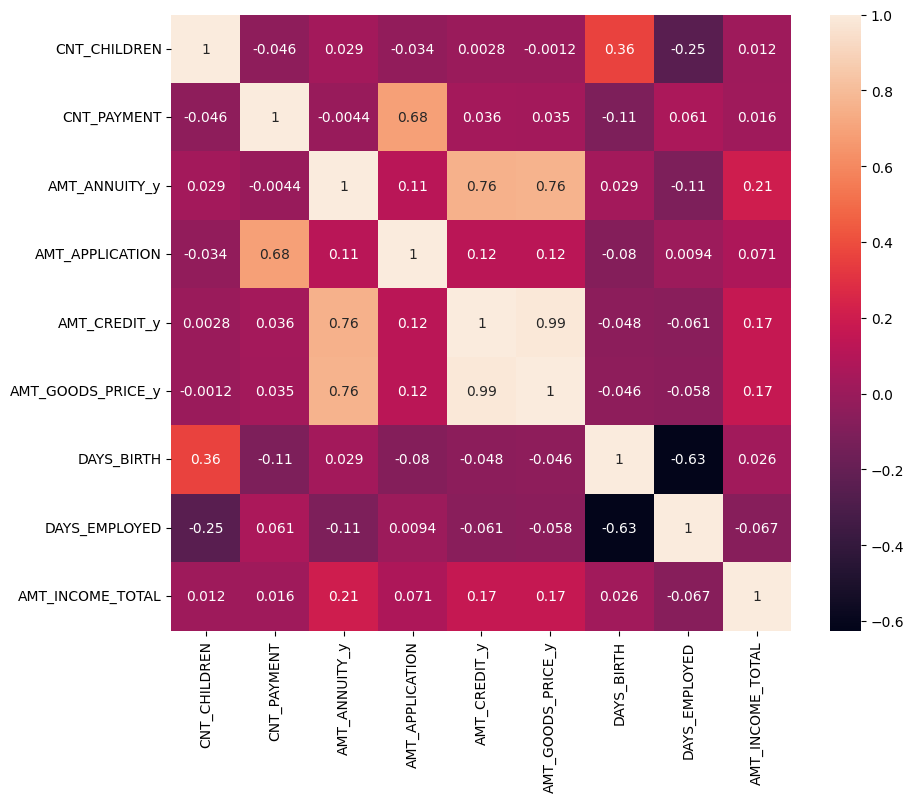

In [56]:
#plotting heatmap of corelations of some columns with each other
plt.figure(figsize=(10,8))
sns.heatmap(correlation_df,annot=True)

<Axes: >

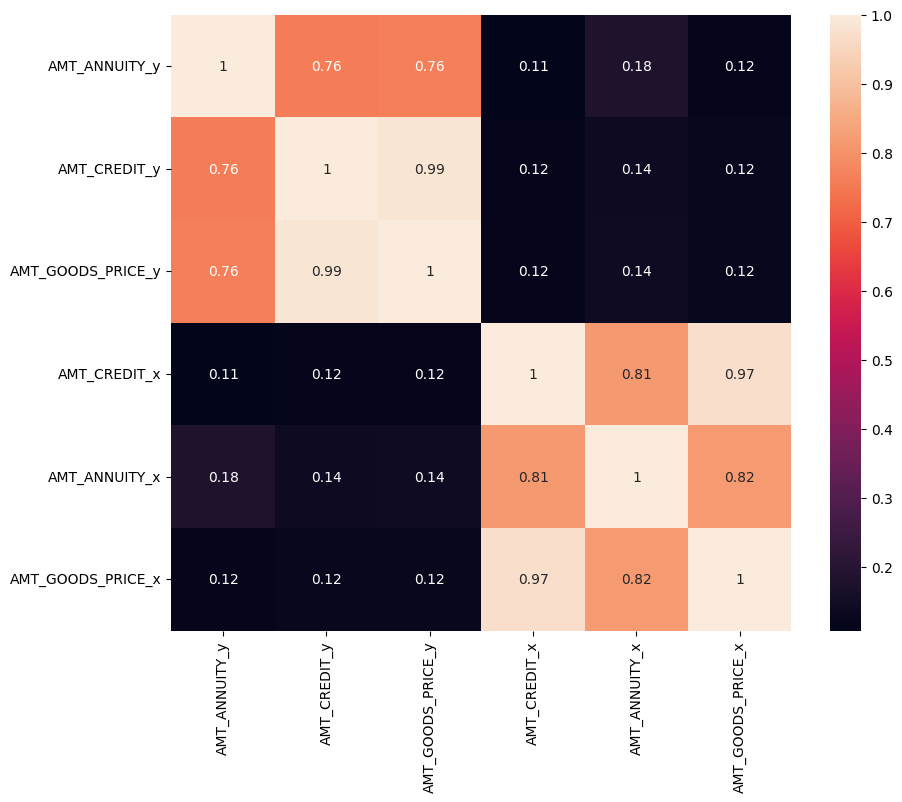

In [57]:
#plotting heatmap for corelations of remaining columns of merged data
column1 = ['AMT_ANNUITY_y','AMT_CREDIT_y','AMT_GOODS_PRICE_y',
           'AMT_CREDIT_x','AMT_ANNUITY_x','AMT_GOODS_PRICE_x']
correlation_df = merge_df[column1].corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlation_df,annot=True)

- Basically above heatmap showing the correlation amongs the columns 
    
    1 Perfect positive correlation (both increase together)
    
   -1 Perfect negative correlation (one increases and another decreases)
   
    0 No correlation
    
- (AMT_CREDIT_y and AMT_GOODS_PRICE_y) , (AMT_GOODS_PRICE_y and AMT_CREDIT_y) , (AMT_CREDIT_x and AMT_GOODS_PRICE_x) , (AMT_GOODS_PRICE_X and AMT_CREDIT_x) having highly correlation (0.99 very close to 1)
- (AMT_ANNUITY_y and AMT_CREDIT_y) , (AMT_ANNUITY_y and AMT_GOODS_PRICE_y) , (AMT_CREDIT_y and AMT_ANNUITY_y) , (AMT_GOODS_PRICE_y) having moderate correlation between them (0.76)
- and remaining others having 0.11 to 0.75 shows low correlations between them

<Axes: xlabel='TARGET', ylabel='count'>

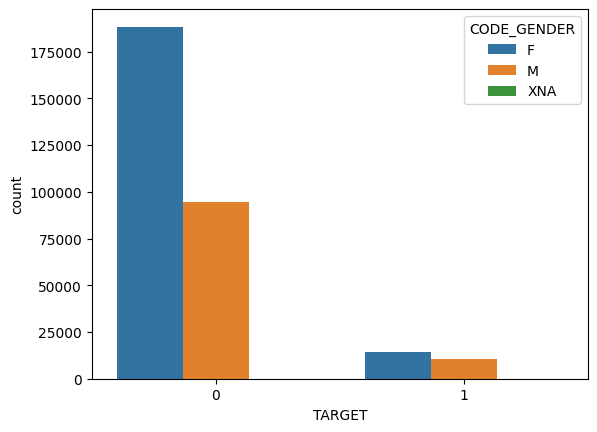

In [58]:
sns.countplot(data = cleaned_df_app, x= 'TARGET', order = cleaned_df_app['TARGET'].value_counts().index,hue= 'CODE_GENDER')

* above graph showing the count of the genders of the applicants.

<Axes: xlabel='NAME_INCOME_TYPE', ylabel='count'>

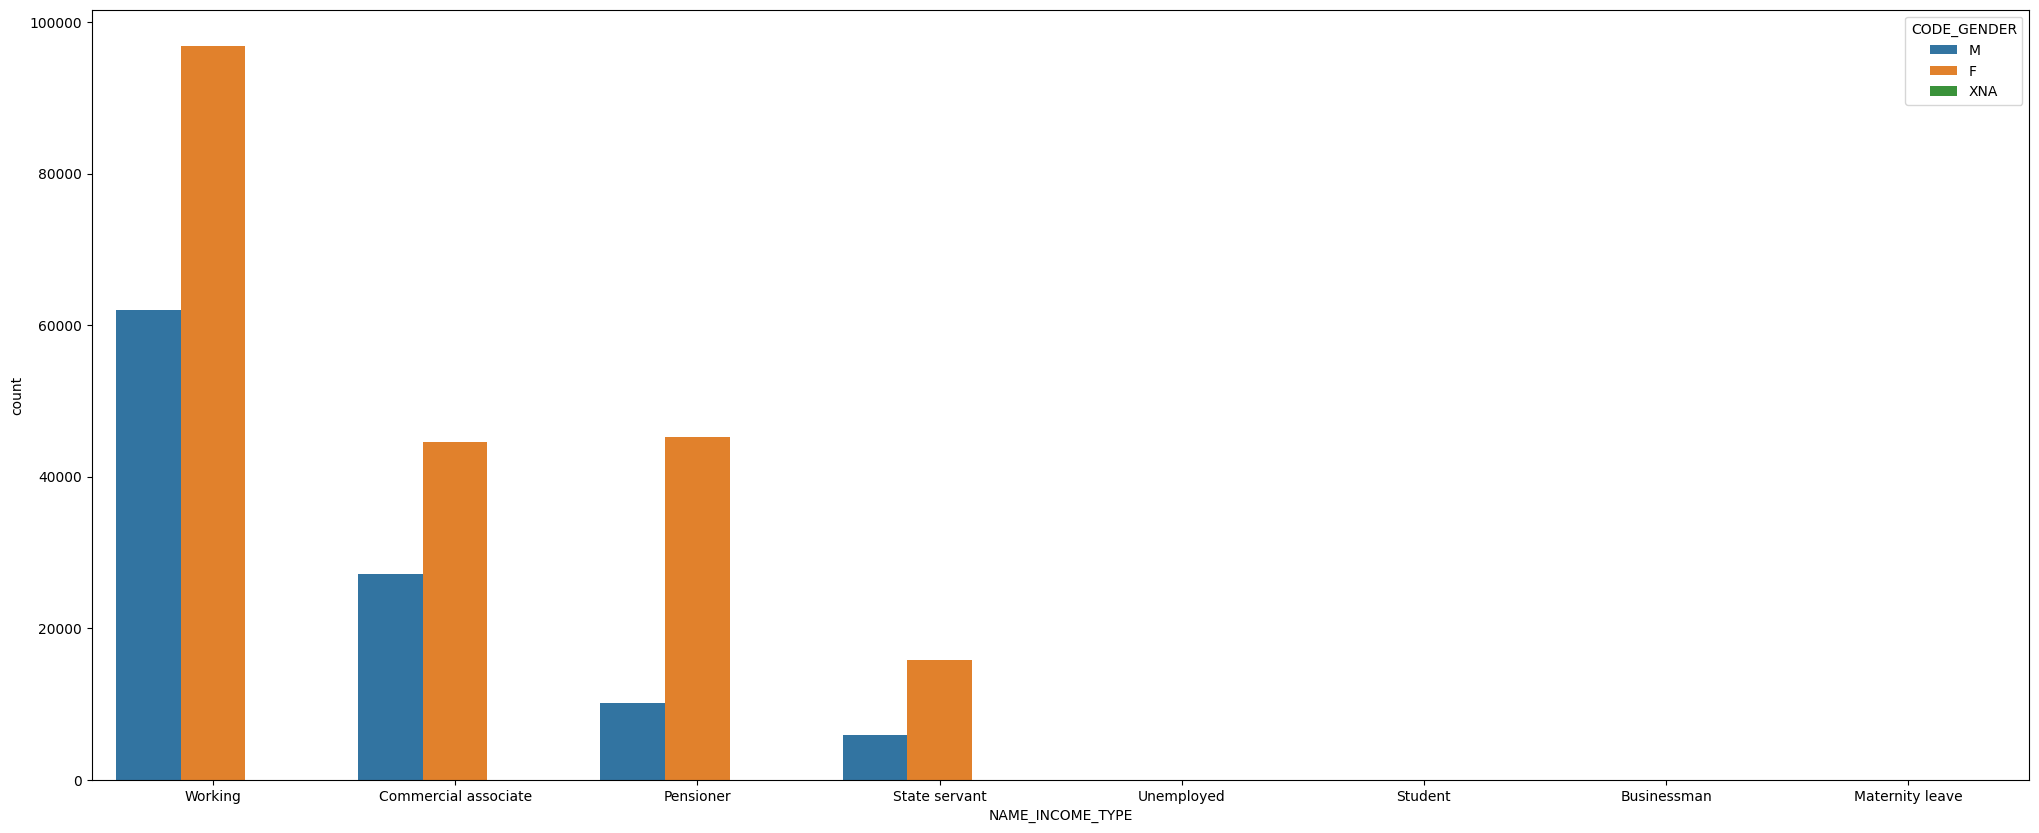

In [59]:
plt.figure(figsize=(25,10))
sns.countplot(data = cleaned_df_app, x= 'NAME_INCOME_TYPE', order = cleaned_df_app['NAME_INCOME_TYPE'].value_counts().index, hue='CODE_GENDER')

* above graph showing the count of genders in diffrent occupations.
* so womens has more chances to get loan

In [60]:
merge_df.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE_x', 'AMT_ANNUITY_x',
       'AMT_APPLICATION', 'AMT_CREDIT_x', 'AMT_GOODS_PRICE_x',
       'WEEKDAY_APPR_PROCESS_START_x', 'HOUR_APPR_PROCESS_START_x',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'DAYS_DECISION',
       'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
       'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION', 'TARGET',
       'NAME_CONTRACT_TYPE_y', 'CODE_GENDER', 'FLAG_OWN_CAR',
       'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT_y',
       'AMT_ANNUITY_y', 'AMT_GOODS_PRICE_y', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'D

In [61]:
# Converting The Data Types of some of the Columns that sholud not be float data-type 

merge_df['DAYS_REGISTRATION'] = pd.to_numeric(merge_df['DAYS_REGISTRATION'],errors='coerce').fillna(0).astype(int)
merge_df['CNT_FAM_MEMBERS'] = pd.to_numeric(merge_df['CNT_CHILDREN'],errors='coerce').fillna(0).astype(int)
merge_df['OBS_30_CNT_SOCIAL_CIRCLE'] = pd.to_numeric(merge_df['OBS_30_CNT_SOCIAL_CIRCLE'],errors='coerce').fillna(0).astype(int)
merge_df['DEF_30_CNT_SOCIAL_CIRCLE'] = pd.to_numeric(merge_df['DEF_30_CNT_SOCIAL_CIRCLE'],errors='coerce').fillna(0).astype(int)
merge_df['OBS_60_CNT_SOCIAL_CIRCLE'] = pd.to_numeric(merge_df['OBS_60_CNT_SOCIAL_CIRCLE'],errors='coerce').fillna(0).astype(int)
merge_df['DEF_60_CNT_SOCIAL_CIRCLE'] = pd.to_numeric(merge_df['DEF_60_CNT_SOCIAL_CIRCLE'],errors='coerce').fillna(0).astype(int)
merge_df['AMT_REQ_CREDIT_BUREAU_HOUR'] = pd.to_numeric(merge_df['AMT_REQ_CREDIT_BUREAU_HOUR'],errors='coerce').fillna(0).astype(int)
merge_df['AMT_REQ_CREDIT_BUREAU_DAY'] = pd.to_numeric(merge_df['AMT_REQ_CREDIT_BUREAU_DAY'],errors='coerce').fillna(0).astype(int)
merge_df['AMT_REQ_CREDIT_BUREAU_WEEK'] = pd.to_numeric(merge_df['AMT_REQ_CREDIT_BUREAU_WEEK'],errors='coerce').fillna(0).astype(int)
merge_df['AMT_REQ_CREDIT_BUREAU_MON'] = pd.to_numeric(merge_df['AMT_REQ_CREDIT_BUREAU_MON'],errors='coerce').fillna(0).astype(int)
merge_df['AMT_REQ_CREDIT_BUREAU_QRT'] = pd.to_numeric(merge_df['AMT_REQ_CREDIT_BUREAU_QRT'],errors='coerce').fillna(0).astype(int)
merge_df['AMT_REQ_CREDIT_BUREAU_YEAR'] = pd.to_numeric(merge_df['AMT_REQ_CREDIT_BUREAU_YEAR'],errors='coerce').fillna(0).astype(int)

- here we are changing the data type of above columns because these columns are containing inappropriate datatypes for ex. 'CNT_FAM_MEMBERS' are containing float datatype it is inlogical because number of childrens are not in float these are in integer datatype that's why we are changing the datatypes of columns

In [62]:
merge_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1413387 entries, 0 to 1413386
Data columns (total 75 columns):
 #   Column                        Non-Null Count    Dtype  
---  ------                        --------------    -----  
 0   SK_ID_PREV                    1413387 non-null  int64  
 1   SK_ID_CURR                    1413387 non-null  int64  
 2   NAME_CONTRACT_TYPE_x          1413387 non-null  object 
 3   AMT_ANNUITY_x                 1413387 non-null  float64
 4   AMT_APPLICATION               1413387 non-null  float64
 5   AMT_CREDIT_x                  1413387 non-null  float64
 6   AMT_GOODS_PRICE_x             1413387 non-null  float64
 7   WEEKDAY_APPR_PROCESS_START_x  1413387 non-null  object 
 8   HOUR_APPR_PROCESS_START_x     1413387 non-null  int64  
 9   FLAG_LAST_APPL_PER_CONTRACT   1413387 non-null  object 
 10  NFLAG_LAST_APPL_IN_DAY        1413387 non-null  int64  
 11  NAME_CASH_LOAN_PURPOSE        1413387 non-null  object 
 12  NAME_CONTRACT_STATUS        

In [63]:
#Columns that we decided will not help in analysis of finding defaulters

merge_df.drop(["FLAG_WORK_PHONE", "FLAG_PHONE", "REGION_RATING_CLIENT", 'FLAG_DOCUMENT_2',
                      "REGION_RATING_CLIENT_W_CITY",  "REGION_RATING_CLIENT", "REGION_RATING_CLIENT_W_CITY", "DAYS_LAST_PHONE_CHANGE",
                    "EXT_SOURCE_2", "EXT_SOURCE_3"], axis=1, inplace = True)

# Checking the Gender and Organization columns for any error

In [64]:
# Checking the gender column first 
merge_df.CODE_GENDER.value_counts()

CODE_GENDER
F      954950
M      458382
XNA        55
Name: count, dtype: int64

In [65]:
# Replacing the 'XNA' values with the demales as majority is females and it won't affect our analysis 
merge_df.CODE_GENDER.replace(to_replace='XNA',value='F',inplace=True)

C:\Users\vinay\AppData\Local\Temp\ipykernel_16276\3110662029.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merge_df.CODE_GENDER.replace(to_replace='XNA',value='F',inplace=True)


In [66]:
merge_df.CODE_GENDER.value_counts()

CODE_GENDER
F    955005
M    458382
Name: count, dtype: int64

In [67]:
# Now checking the Organization Column 
merge_df.ORGANIZATION_TYPE.value_counts()

ORGANIZATION_TYPE
Business Entity Type 3    304812
XNA                       273562
Self-employed             183050
Other                      73503
Medicine                   52078
Business Entity Type 2     46388
Government                 45732
School                     38999
Trade: type 7              37238
Kindergarten               31353
Construction               29710
Business Entity Type 1     25475
Transport: type 4          24605
Security                   15607
Industry: type 3           15245
Industry: type 9           14700
Housing                    13705
Trade: type 3              13665
Industry: type 11          12128
Military                   11580
Trade: type 2              11098
Agriculture                10780
Bank                       10684
Police                     10346
Postal                     10065
Transport: type 2           9171
Security Ministries         8431
Restaurant                  8253
Services                    7019
Industry: type 7         

In [68]:
# As 55374 vales are XNA therefore we have to drop XNA 
merge_df = merge_df.drop(merge_df[merge_df['ORGANIZATION_TYPE'] == 'XNA'].index, axis=0)

In [69]:
# Now checking ORGANIZATION_TYPE 
merge_df.ORGANIZATION_TYPE.value_counts()

ORGANIZATION_TYPE
Business Entity Type 3    304812
Self-employed             183050
Other                      73503
Medicine                   52078
Business Entity Type 2     46388
Government                 45732
School                     38999
Trade: type 7              37238
Kindergarten               31353
Construction               29710
Business Entity Type 1     25475
Transport: type 4          24605
Security                   15607
Industry: type 3           15245
Industry: type 9           14700
Housing                    13705
Trade: type 3              13665
Industry: type 11          12128
Military                   11580
Trade: type 2              11098
Agriculture                10780
Bank                       10684
Police                     10346
Postal                     10065
Transport: type 2           9171
Security Ministries         8431
Restaurant                  8253
Services                    7019
Industry: type 7            6118
University               

# Creating Bins for the 'AMT_INCOME_TOTAL' and 'AMT_CREDIT'

In [70]:
bins_income = [
    0, 25000, 50000, 75000, 100000, 125000, 150000, 175000, 200000, 225000, 250000,
    275000, 300000, 325000, 350000, 375000, 400000, 425000, 450000, 450800, 475000, 500000]

slot_income = [
    '0-25000', '25000-50000', '50000-75000', '75000-100000', '100000-125000', '125000-150000',
    '150000-175000', '175000-200000', '200000-225000', '225000-250000', '250000-275000',
    '275000-300000', '300000-325000', '325000-350000', '350000-375000', '375000-400000',
    '400000-425000', '425000-450000', '450000-450800', '450800-475000', '475000-500000']

merge_df['AMT_INCOME_RANGE'] = pd.cut(
    merge_df['AMT_INCOME_TOTAL'], bins=bins_income, labels=slot_income, right=False)

- here we are creating bins means dividing the range of continuous data into intervals or gropus.

# Checking For the Target value counts for checking who are defaulters

In [71]:
# Having a look at the Target Data 
merge_df.TARGET.value_counts()

TARGET
0    1033548
1     106277
Name: count, dtype: int64

In [78]:
tar0_percentage = (1033548 / 1139825 )*100
tar0_percentage

90.67602482837277

In [79]:
tar1_percentage = (106277 / 1139825 )*100
tar1_percentage

9.323975171627223

- Here 'TARGET = 0 ' means the people those who are non-defaulters 
- and, 'TARGET = 1' means the people those who are defaulters

C:\Users\vinay\AppData\Local\Temp\ipykernel_18756\1465688675.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


Text(0, 0.5, 'Count')

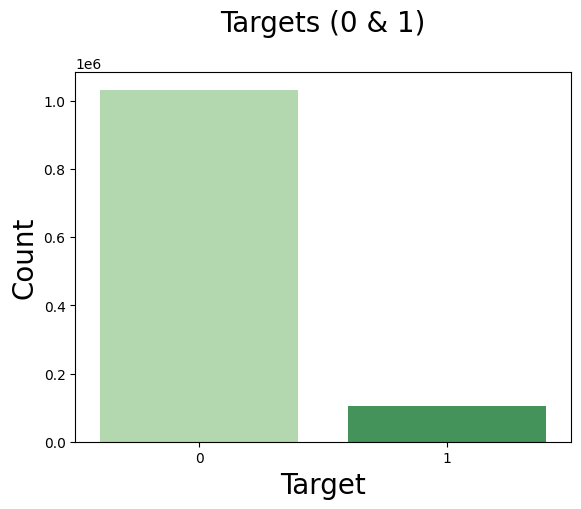

In [85]:
# Plotting for the Targets 

# Use Seaborn's barplot for horizontal bars along the x-axis
sns.barplot(
    x=merge_df['TARGET'].value_counts().index,
    y=merge_df['TARGET'].value_counts().values,
    palette='Greens')

# Add title and labels
plt.title('Targets (0 & 1)\n', fontsize=20)
plt.xlabel('Target', fontsize=20)
plt.ylabel('Count', fontsize=20)

# Univariate Analysis

In [92]:
target0.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE_x', 'AMT_ANNUITY_x',
       'AMT_APPLICATION', 'AMT_CREDIT_x', 'AMT_GOODS_PRICE_x',
       'WEEKDAY_APPR_PROCESS_START_x', 'HOUR_APPR_PROCESS_START_x',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'DAYS_DECISION',
       'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
       'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION', 'TARGET',
       'NAME_CONTRACT_TYPE_y', 'CODE_GENDER', 'FLAG_OWN_CAR',
       'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT_y',
       'AMT_ANNUITY_y', 'AMT_GOODS_PRICE_y', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'D

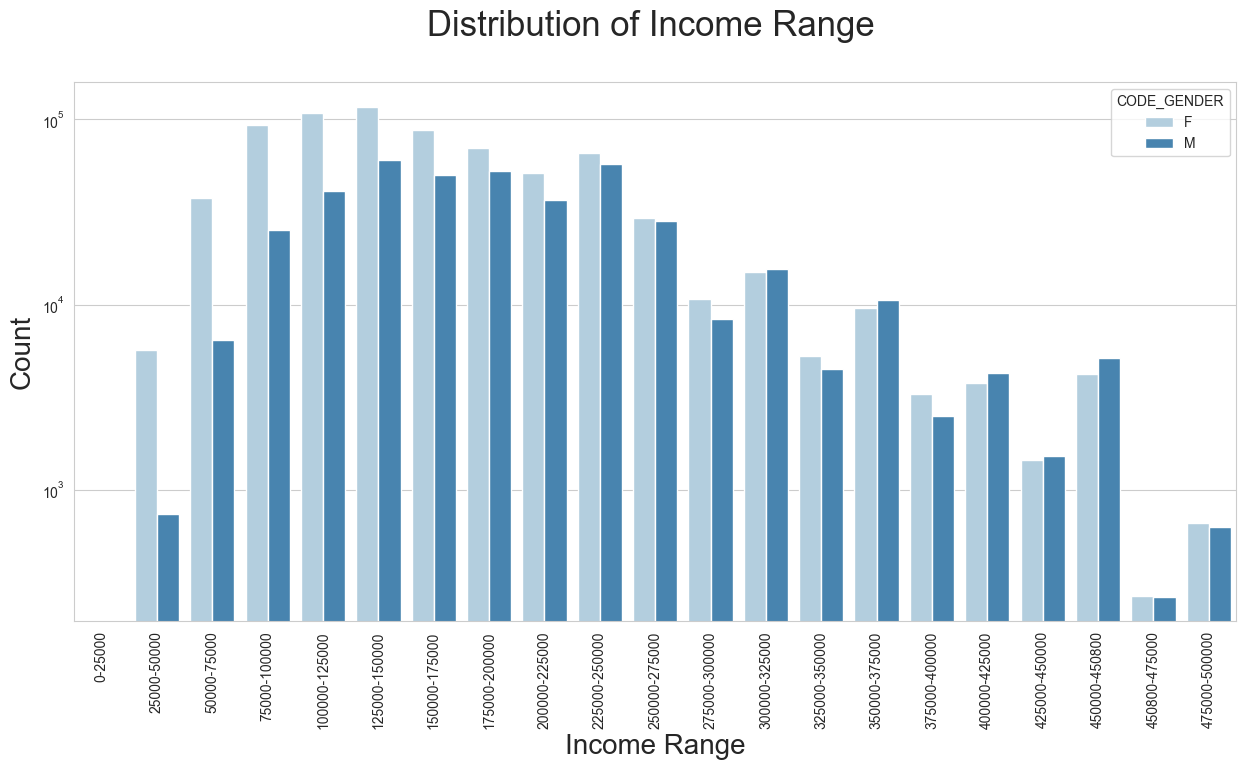

In [97]:
# Plotting for Income Range across various Gender.
plt.figure(figsize=[15,7])
sns.set_style('whitegrid')
sns.countplot(data=merge_df, x='AMT_INCOME_RANGE', hue='CODE_GENDER', palette='Blues')
plt.xticks(rotation=90)
plt.title('Distribution of Income Range \n', fontsize=25)
plt.xlabel('Income Range', fontsize=20)
plt.ylabel('Count', fontsize=20)
plt.yscale('log')
plt.show()

# Conclusions From the Graph : 
- income Range from 125000 to 150000 is having more number of Credits
- Very Less Counts From Range 40800 to 475000
- it seems that the females are more than male in having cfor range 125000 to 150000

# Conclusion

* With the above analysis we can get the information of the category who are eligible to get loan easily.
* As per analysis we can say that working womens are more eligible to get loan.
* Insights that i got here is we have column called 'Target' which has the 0 and 1 value for the people who face value is for people who face difficulty paying the loan and is all other cases like the people who paid the loans even having difficulties they paid the loan amount back to bank.
* 'Target' 1 goes with the people who have difficulty in paying back the loan and that says that in the entire dataset if 9% of people are facing problems to pay the loan then 90% of people are paying back loan to bank on Time .
* But problem is these 9% of people who have difficulties paying back laon amount to bank these 'Target' people these are dangerous to bank as, suppose if one of customers take loan amount of one crore and falls in these ratio which did not pay back the loan that means this customer is backstab to the bank, so this dataset gives imbalance in the data so bank should work on the working they are giving loans to the customers.